## Driver code generating brain-maps

### Steps
- import stat csvs 
- visualize quantitative performance  
- visualize brain regions

In [7]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
import pickle
import time

import matplotlib.pyplot as plt
import seaborn as sns

import nibabel as nib
from surfer import Brain
from mayavi import mlab

mlab.init_notebook()
mlab.options.offscreen = True

%env SUBJECTS_DIR=/home/nikhil/projects/CT_reproduce/data/fs_test_dir/

sys.path.append('../')
from lib.plot_utils import *

Notebook initialized with x3d backend.
env: SUBJECTS_DIR=/home/nikhil/projects/CT_reproduce/data/fs_test_dir/


### Data paths

In [8]:
proj_dir = '/home/nikhil/projects/CT_reproduce/code/compare-surf-tools/'
data_dir = proj_dir + 'data/'
results_dir = data_dir + 'results/'
brainmaps_dir = results_dir + 'brainmaps/'
demograph_file = 'ABIDE_Phenotype.csv'
sm_perf_file = 'atlas_sm_perf_DX_GROUP_QC_gleb_N_225.pkl'

### Global Vars

In [9]:
subject_ID_col = 'SubjID'
subjects_dir = '/home/nikhil/projects/CT_reproduce/data/fs_test_dir/'
subject_id = "fsaverage"

### Load data

In [10]:
# Demographics and Dx
demograph = pd.read_csv(data_dir + demograph_file)
demograph = demograph.rename(columns={'Subject_ID':subject_ID_col})

# # Results
# atlas or pipelines
results_type = 'atlas' # atlas

if results_type == 'pipeline':
    stat_perf = pd.read_pickle(results_dir + sm_perf_file)
        
else:
    with open(results_dir + sm_perf_file, 'rb') as handle:
        stat_perf = pickle.load(handle)

### Statistical plots 

Plots based on 225 subjects
Top 5 most significant regions             roi     t_val     p_val  p_val_corr
251   R_10d_ROI -3.255523  0.001132    0.241724
63    L_p32_ROI -3.083747  0.002044    0.241724
244   R_10r_ROI -3.023448  0.002499    0.241724
338   R_LO3_ROI  3.001580  0.002686    0.241724
112  L_FOP1_ROI -2.833615  0.004602    0.291232


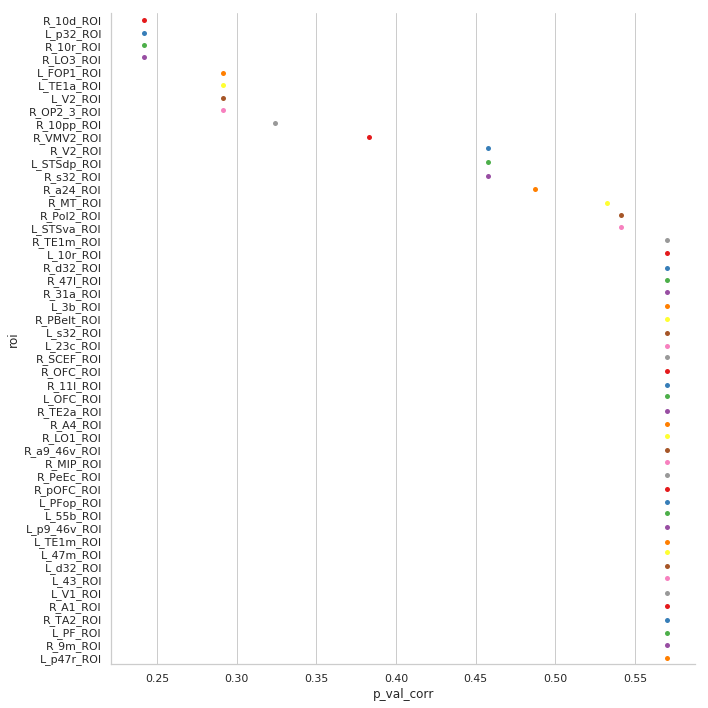

In [16]:
# Plots
aparc = 'Glasser' #aparc #Destrieux #Glasser
stat_measure = 'p_val_corr'
top_rois = 50
subx = sm_perf_file.rsplit('_',1)[1].split('.',1)[0]
print('Plots based on {} subjects'.format(subx))

if results_type == 'pipeline':
    plot_df = stat_perf.sort_values(by=[stat_measure]).head(top_rois)
    sns.set(font_scale=1)
    with sns.axes_style("whitegrid"):
        g = sns.catplot(x=stat_measure,y='roi',kind='strip',hue='pipeline',
                        data=plot_df,palette='Set1',height=10)
        #g.set(xscale="log");

else:
    plot_df = stat_perf[aparc].sort_values(by=['p_val']).head(top_rois)

    sns.set(font_scale=1)
    with sns.axes_style("whitegrid"):
        g = sns.catplot(x=stat_measure,y='roi',kind='strip',
                        data=plot_df,palette='Set1',height=10)
        #g.set(xscale="log");
        
print('Top 5 most significant regions {}'.format(plot_df.head(5)))

## PySurfer 

In [6]:
pipe = 'fs60'
aparc = 'aparc' #aparc #Destrieux #Glasser
p_thresh = 0.05

if results_type == 'pipeline':
    stat_df = stat_perf[stat_perf['pipeline']==pipe]
else:
    stat_df = stat_perf[aparc]

signific_rois = stat_df[stat_df[stat_measure] < p_thresh]['roi'].values
print('Number of signficant ROIs {}'.format(len(signific_rois)))

plot_regions_L,plot_regions_R = get_pysurfer_label_format(signific_rois,aparc)
print('plot regions \nleft: {}, \nright: {}'.format(plot_regions_L,plot_regions_R))


# Pysurfer parameters
surf = 'inflated' #'white' #"inflated"
views = ['lateral','medial']
save_dir = brainmaps_dir

if aparc == 'Glasser':
    aparc_file = '.HCP-MMP1.annot' 
elif aparc == 'Destrieux':
    aparc_file = '.aparc.a2009s.annot' 
elif aparc in ['aparc', 'DKT']:
    aparc_file = '.aparc.annot'
else:
    aparc_file = ''
    print('Unknown cortical parcellation')
    
for hemi in ['lh','rh']:
    if hemi=='lh':
        signific_rois = plot_regions_L
    elif hemi=='rh':
        signific_rois = plot_regions_R
    else: 
        print('Unknown hemisphere parameter')

    for view in views:
        title = '_{}_{}_{}_{}_{}_{}_N_{}'.format(pipe,aparc,surf,hemi,view,stat_measure,subx)
        brain_fig = create_surface_plot(subject_id,hemi,surf,aparc_file,signific_rois,save_dir,title,view)
        time.sleep(5) #Mayavi messes up if called to quickly

Number of signficant ROIs 0
plot regions 
left: [], 
right: []
number of total vertices 163842 and ROIs 36
number of significant rois 0
{0.0: 149955, -1.0: 13887}
colormap sequential: [-1.00e+00, -5.00e-01, 0.00e+00] (opaque)
Image saved at /home/nikhil/projects/CT_reproduce/code/compare-surf-tools/data/results/brainmaps/surf_fs60_aparc_inflated_lh_lateral_p_val_corr_N_975.png
number of total vertices 163842 and ROIs 36
number of significant rois 0
{0.0: 149955, -1.0: 13887}
colormap sequential: [-1.00e+00, -5.00e-01, 0.00e+00] (opaque)
Image saved at /home/nikhil/projects/CT_reproduce/code/compare-surf-tools/data/results/brainmaps/surf_fs60_aparc_inflated_lh_medial_p_val_corr_N_975.png
number of total vertices 163842 and ROIs 36
number of significant rois 0
{0.0: 149926, -1.0: 13916}
colormap sequential: [-1.00e+00, -5.00e-01, 0.00e+00] (opaque)
Image saved at /home/nikhil/projects/CT_reproduce/code/compare-surf-tools/data/results/brainmaps/surf_fs60_aparc_inflated_rh_lateral_p_val_co